# Scrape Data From Reddit

Author: Zoumana KEITA

In [23]:
!pip -q install praw

In [24]:
# Import the PRAW API
from praw import Reddit

# Configure an instance of your app
my_Reddit_App = Reddit(client_id = '',
                       client_secret = '',
                       user_agent = '')

In [25]:
data_science_subreddit = my_Reddit_App.subreddit('DataScience').hot(limit=100)

print(data_science_subreddit)

In [26]:
next_reddit = next(data_science_subreddit)
print(type(next_reddit))


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



<class 'praw.models.reddit.submission.Submission'>


In [27]:
all_attributes = dir(next_reddit)


In [28]:
def print_attributes_in_table(data, columns):
    for i in range(0, len(data), columns):
        print(',\t'.join(data[i:i+columns]))

print_attributes_in_table(all_attributes, 5)

STR_FIELD,	__class__,	__delattr__,	__dict__,	__dir__
__doc__,	__eq__,	__format__,	__ge__,	__getattr__
__getattribute__,	__gt__,	__hash__,	__init__,	__init_subclass__
__le__,	__lt__,	__module__,	__ne__,	__new__
__reduce__,	__reduce_ex__,	__repr__,	__setattr__,	__sizeof__
__str__,	__subclasshook__,	__weakref__,	_additional_fetch_params,	_chunk
_comments_by_id,	_edit_experimental,	_fetch,	_fetch_data,	_fetch_info
_fetched,	_kind,	_reddit,	_replace_richtext_links,	_reset_attributes
_safely_add_arguments,	_url_parts,	_vote,	add_fetch_param,	all_awardings
allow_live_comments,	approved_at_utc,	approved_by,	archived,	author
author_flair_background_color,	author_flair_css_class,	author_flair_richtext,	author_flair_template_id,	author_flair_text
author_flair_text_color,	author_flair_type,	author_fullname,	author_is_blocked,	author_patreon_flair
author_premium,	award,	awarders,	banned_at_utc,	banned_by
can_gild,	can_mod_post,	category,	clear_vote,	clicked
comment_limit,	comment_sort,	comments,	co

In [29]:
def extract_comments_from_forest(submission):

    all_comments = []

    # Start iterating through each comment in the forest and get the content
    submission.comments.replace_more(limit=0) # Flatten the tree
    comments = submission.comments.list() # all the comments

    for comment in comments:
        all_comments.append(comment.body)

    return all_comments

In [30]:
import pandas as pd
import datetime as dt

def extract_top_N_posts(topic_of_interest, N = 100):

  topic_of_interest = topic_of_interest.replace(' ', '')
  final_list_of_dict = []
  dict_result = {}

  submissions = my_Reddit_App.subreddit(topic_of_interest).hot(limit=N)

  for submission in submissions:
    dict_result["title"] = submission.title
    dict_result["creation_date"] = dt.datetime.fromtimestamp(submission.created)
    dict_result["id"] = submission.id
    dict_result["url"] = submission.url
    dict_result["comments"] = extract_comments_from_forest(submission)

    final_list_of_dict.append(dict_result)
    dict_result = {}

  # Create the dataframe
  df = pd.DataFrame(final_list_of_dict)

  return df


In [31]:
data_science_reddits_df = extract_top_N_posts('DataScience')

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [32]:
print(data_science_reddits_df.shape)
display(data_science_reddits_df.head())


(100, 5)


,title,creation_date,id,url,comments
0,Weekly Entering & Transitioning - Thread 07 Au...,2023-08-07 04:01:27,15k9q93,https://www.reddit.com/r/datascience/comments/...,[Hello everyone\nIm a highschooler about to go...
1,How to learn as a full time employee?,2023-08-09 12:27:13,15mdw2i,https://www.reddit.com/r/datascience/comments/...,"[When you choose a career in technology, in pa..."
2,Algorithmic Marketing Books,2023-08-09 18:16:17,15mn0m3,https://www.reddit.com/r/datascience/comments/...,[I'm a big fan of the first book you mentioned...
3,Is my internship worthless?,2023-08-09 03:51:36,15m41kq,https://www.reddit.com/r/datascience/comments/...,[Experience is never worthless. Also I landed ...
4,DataAnalyst.com - I launched a niche job board...,2023-08-09 18:23:55,15mn7om,https://www.reddit.com/r/datascience/comments/...,[]


## Data Cleaning

In [33]:
!pip -q install nltk
!pip -q install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for emoji: filename=emoji-2.7.0-py2.py3-none-any.whl size=356563 sha256=928b6e8e9c215a856bd5226f37b790a3395d94e5752bca170788d8627af7d530
  Stored in directory: /root/.cache/pip/wheels/41/11/48/5df0b9727d5669c9174a141134f10304d1d78a3b89a4676f3d
Successfully built emoji


In [34]:
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")


import re
from emoji import demojize

STOPWORDS = set(stopwords.words('english'))
MIN_LEN = 2

def clean_text(text):

  #Remove all closing and opening brakets
  text = re.sub(r"[\([{})\]]", "", text)

  # Remove URLs
  text = re.sub(r"http\S+", "", text)

  # Remove numeric values
  text = re.sub(r"[0-9]", "", text)

  # Remove stopwords
  text = " ".join([word for word in text.split() if word not in STOPWORDS])

  # Remove words with length < threshold
  text = " ".join([word for word in text.split() if len(word) > MIN_LEN])

  # Convert emojis to textual format
  text = demojize(text)

  return text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Data Visualization Function

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(comments):

  all_comments = ' '.join(comments)

  wordcloud = WordCloud(width=5000, height=4000,
                           background_color='black',
                           min_font_size=10).generate(all_comments)

  plt.figure(figsize=(12, 12), facecolor='k', edgecolor='k')
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()

## Show the wordcloud

In [40]:
!pip -q install more-itertools

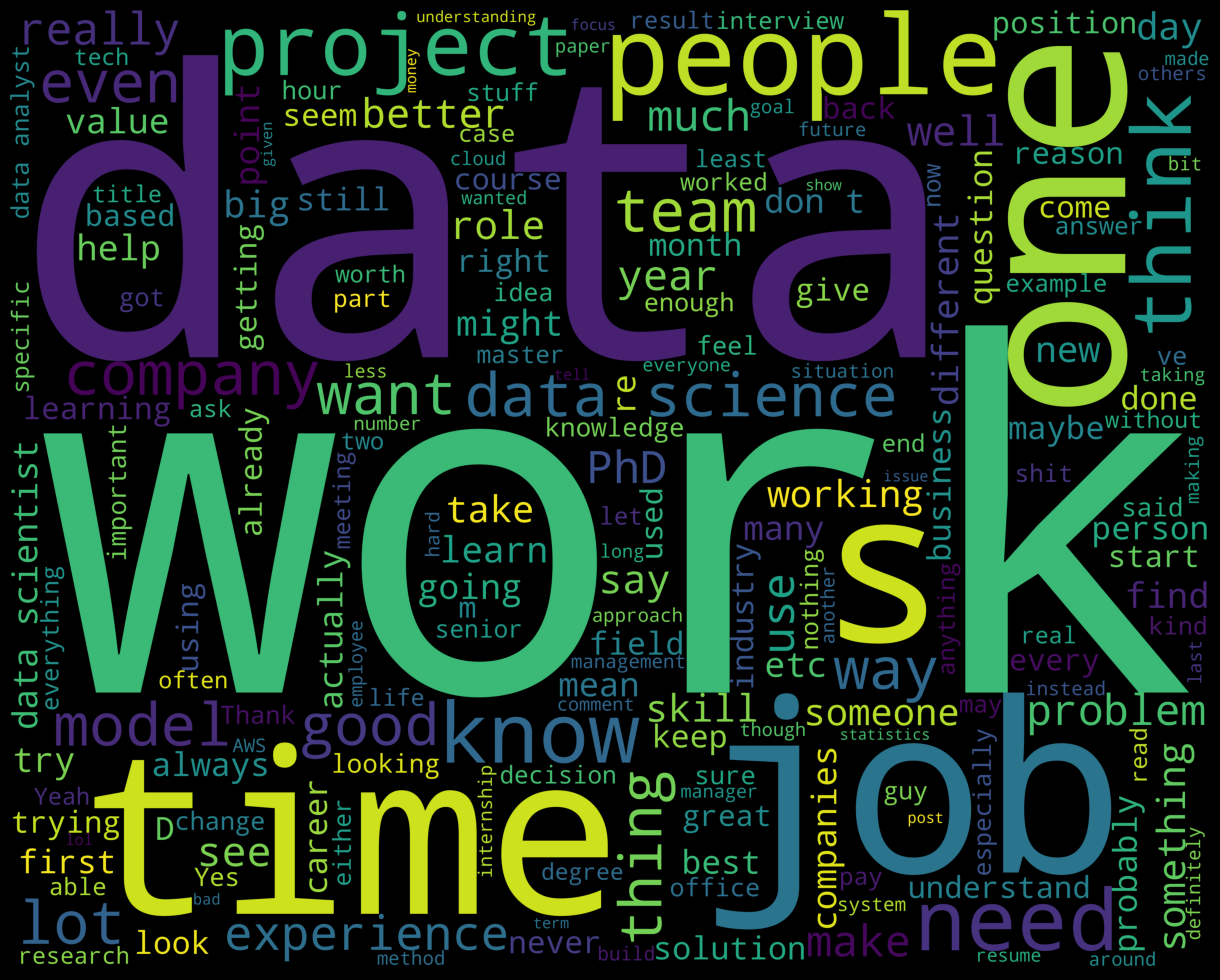

In [46]:
import itertools

# Get all the comments
list_all_comments = data_science_reddits_df['comments'].tolist()

# Remove all the empty lists (empty comments)
list_all_comments = [list_of_comments for list_of_comments in list_all_comments if list_of_comments != []]

# Convert all the comments as a single list
all_comments = list(itertools.chain.from_iterable(list_all_comments))

# Clean the comments
cleaned_comments = [clean_text(comment) for comment in all_comments]

# Show the wordcloud
show_wordcloud(cleaned_comments)